# Error estándar

Material en construcción, Edgar Rueda, febrero 2021

**Conocimientos previos recomendados**
- Concepto variable aleatoria.
- El concepto de distribución gaussiana.
- El concepto de media y desviación estándar.
- Teorema del límite central.

**Bibliografía**
- Hughes, I., & Hase, T. (2010). Measurements and their uncertainties: a practical guide to modern error analysis. Oxford University Press.

- Lyons, L., & Louis, L. (1991). A practical guide to data analysis for physical science students. Cambridge University Press.

- Squires, G. L. (2001). Practical physics. Cambridge university press.

- Gorgas, J. & Cardiel, N. & Zamorano, J. (2011). ESTADÍSTICA BASICA para estudiantes de Ciencias.

## 1. Los datos experimentales
A continuación presentamos los datos experimentales que se obtuvieron de grabar la amplitud de una señal de radio cada 23 microsegundos por un periodo de 9.4 segundos (figura 1). La radio no estaba sintonizada por lo que la señal obtenida es básicamente ruido aleatorio, es decir, valores aleatorios de amplitud que oscilan alrededor de un valor (promedio). Como era de esperarse, la distribución obtenida se asemeja a una distribución gaussiana (figura 2).

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
Frecuencia grabación fs = 44100.0 datos/s
Número de datos = 413696
Duración = 9.4 s
Muestreo temporal = 0.000023 s


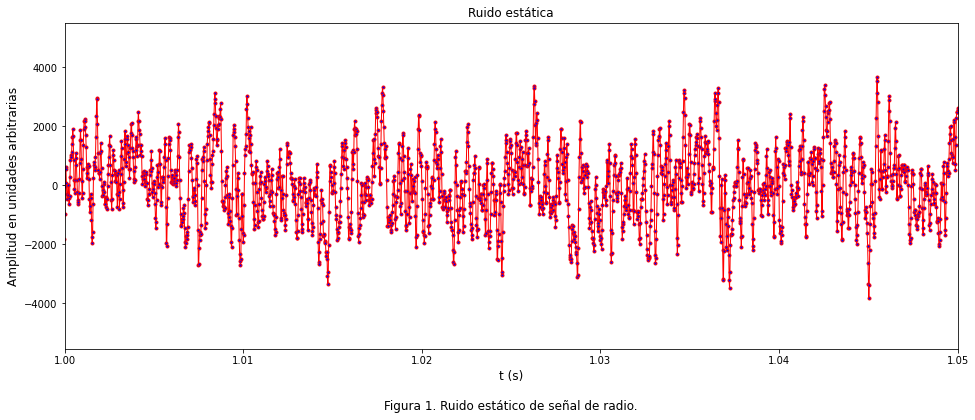

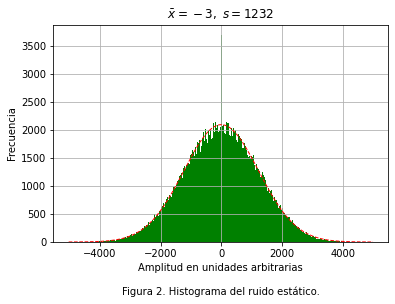

In [ ]:
#@title *Código: librerías y archivo sonido*
#############
# Código de Google Colaboratory para subir el archivo WAV y trabajar con él
from google.colab import drive 
drive.mount('/content/gdrive')

!cp '/content/gdrive/My Drive/CURSOS/Física Experimental II/01 - ESTADÍSTICA/Distribución Gaussiana/Radio FM 101.6.wav' 'estatica.wav'

# Para ejecutar desde el Colab Notebooks comentar la línea anterior (6) y descomentar las siguiente línea (9)
#!cp '/content/gdrive/My Drive/Colab Notebooks/Radio FM 101.6.wav' 'estatica'
#############

import numpy as np
import matplotlib.pylab as plt
from scipy.io import wavfile
import matplotlib
import IPython.display as ipd
from scipy.stats import norm

fs, data = wavfile.read('estatica.wav')
data = data[:,0]

tamdata = data.size
duration = tamdata/fs
dt = duration/tamdata
t = np.arange(0,duration,dt)

print('Frecuencia grabación fs = %.1f datos/s' % fs)
print('Número de datos = %.f' % tamdata)
print('Duración = %.1f s'  % duration)
print('Muestreo temporal = %f s' % dt)

plt.figure(figsize=(16,6))
plt.plot(t,data,lw=1,color='r',marker='.',ms=6,markerfacecolor='blue')
plt.title('Ruido estática')
plt.ylabel('Amplitud en unidades arbitrarias',fontsize=12)
plt.xlabel('''t (s)

Figura 1. Ruido estático de señal de radio.''',fontsize=12)
plt.xlim(1,1.05)
plt.show()

ipd.Audio('estatica.wav') # load a local WAV file

# the histogram of the data
n, bins, patches = plt.hist(data, bins=int(np.sqrt(len(data))), facecolor='green')

# add a 'best fit' line
mu = np.mean(data)
sigma = np.std(data,ddof=1)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y*tamdata*abs(bins[0]-bins[1]), 'r--', linewidth=1)

plt.xlabel('''Amplitud en unidades arbitrarias

Figura 2. Histograma del ruido estático.''')
plt.ylabel('Frecuencia')
plt.title(r'$ \bar x=%.f,\ s=%.f$'%(mu,sigma))
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.show()

Si nuestro objetivo es determinar el valor promedio de amplitud de la señal, estadísticamente lo único que podemos decir es que con un 68% de confiabilidad el valor promedio de amplitud es $-3 \pm 1200$. Claramente es un resultado terrible, donde el error es tres órdenes de magnitud superior al valor que queremos reportar. En conclusión, no tenemos idea de cuál es el valor promedio de amplitud.

##2. Error estándar
Sin embargo, hemos pasado por alto algo, lo que nos interesa no es conocer la dispersión de los datos, lo que nos interesa es la dispersión del valor promedio medido (cuando lo medimos varias veces). Entonces lo que nos interesa es construir una distribución que nos de el valor medio del valor promedio de la distribución original, y las desviación estándar del promedio (la desviación estándar del promedio la llamaremos de ahora en adelante error estándar). Por el teorema del límite central sabemos que entre más datos usemos para determinar el promedio más se parecerá la distribución obtenida a una distribución normal, y el error estándar será menor. Miremos esto paso a paso:

Tomemos los datos experimentales, agrupémoslos de a cinco ($n = 5$), construyamos una nueva distribución y volvamos a reportar el valor promedio de amplitud de la señal, usando como error el error estándar dado por la expresión:

$$ \alpha = \frac{s}{\sqrt{n}} \quad (1) $$

Aquí es importante precisar que $s$ es la desviación estándar de la muestra dada por la expesión:

$$ s = \frac{1}{\sqrt{n-1}} \sqrt{\sum\limits_{i=1}^n (x_i - \bar x)^2} \quad (2) $$

donde $\bar x$ es la media aritmética de la muestra.

NOTA: para garantizar que los datos sean completamente aleatorios hemos usado la función *numpy.random.noise()* para escoger los valores a agrupar del conjunto de todos los datos.

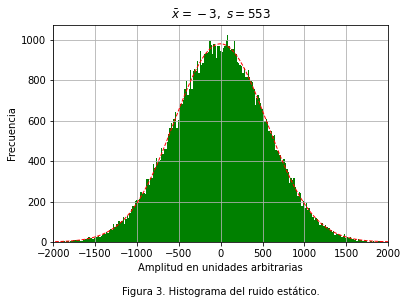

Error estándar predicho por la ecuación 2: 551


In [ ]:
#@title Código:
def agrupa(ImaX,n):
  np.random.seed(0)
  newDist = []
  for ii in range(int(len(ImaX)/n)):
    prome = np.sum(np.random.choice(ImaX,n))/n
    newDist.append(prome)
  return newDist


dataE = agrupa(data,5)

# the histogram of the data
n, bins, patches = plt.hist(dataE, bins=int(np.sqrt(len(dataE))), facecolor='green')

# add a 'best fit' line
mu = np.mean(dataE)
sigma = np.std(dataE,ddof=1)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y*len(dataE)*abs(bins[0]-bins[1]), 'r--', linewidth=1)

plt.xlabel('''Amplitud en unidades arbitrarias

Figura 3. Histograma del ruido estático.''')
plt.ylabel('Frecuencia')
plt.title(r'$ \bar x=%.f,\ s=%.f$'%(mu,sigma))
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.xlim(-2000,2000)
plt.show()
print('Error estándar predicho por la ecuación 2: %.f'%(1232/np.sqrt(5)))

Vemos que agrupando de a cinco datos el valor reportado sería $-3 \pm 600$. El error ha disminuido, pero sigue siendo muy grande. Noten que el error predicho por la distribución coincide con el error predicho por la ecuación 2, lo que es un buen indicio de la aleatoriedad de los datos tomados. Agrupemos ahora de a 100 datos:

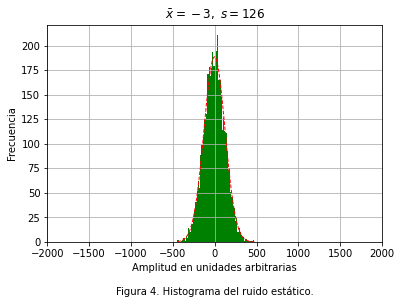

Error estándar predicho por la ecuación 2: 123


In [ ]:
#@title Código:
def agrupa(ImaX,n):
  newDist = []
  for ii in range(int(len(ImaX)/n)):
    prome = np.sum(np.random.choice(ImaX,n))/n
    newDist.append(prome)
  return newDist


dataE = agrupa(data,100)

# the histogram of the data
n, bins, patches = plt.hist(dataE, bins=int(np.sqrt(len(dataE))), facecolor='green')

# add a 'best fit' line
mu = np.mean(dataE)
sigma = np.std(dataE,ddof=1)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y*len(dataE)*abs(bins[0]-bins[1]), 'r--', linewidth=1)

plt.xlabel('''Amplitud en unidades arbitrarias

Figura 4. Histograma del ruido estático.''')
plt.ylabel('Frecuencia')
plt.title(r'$ \bar x=%.f,\ s=%.f$'%(mu,sigma))
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.xlim(-2000,2000)
plt.show()
print('Error estándar predicho por la ecuación 2: %.f'%(1232/np.sqrt(100)))

El valor a reportar ahora es $-3 \pm 130$, mucho mejor, pero aún la incertidumbre es muy grande. Agrupemos ahora 1000 datos:

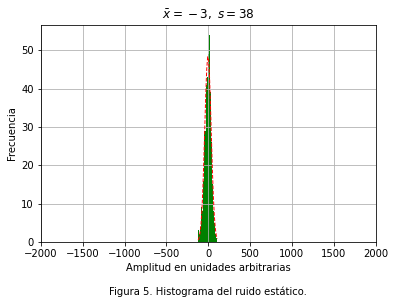

Error estándar predicho por la ecuación 2: 39


In [ ]:
#@title Código:
def agrupa(ImaX,n):
  newDist = []
  for ii in range(int(len(ImaX)/n)):
    prome = np.sum(np.random.choice(ImaX,n))/n
    newDist.append(prome)
  return newDist


dataE = agrupa(data,1000)

# the histogram of the data
n, bins, patches = plt.hist(dataE, bins=int(np.sqrt(len(dataE))), facecolor='green')

# add a 'best fit' line
mu = np.mean(dataE)
sigma = np.std(dataE,ddof=1)
y = norm.pdf( bins, mu, sigma)
l = plt.plot(bins, y*len(dataE)*abs(bins[0]-bins[1]), 'r--', linewidth=1)

plt.xlabel('''Amplitud en unidades arbitrarias

Figura 5. Histograma del ruido estático.''')
plt.ylabel('Frecuencia')
plt.title(r'$ \bar x=%.f,\ s=%.f$'%(mu,sigma))
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.xlim(-2000,2000)
plt.show()
print('Error estándar predicho por la ecuación 2: %.f'%(1232/np.sqrt(1000)))

El valor a reportar sería $-3 \pm 40$, mucho mejor. Podríamos continuar construyendo histogramas agrupando cada vez más datos, pero finalmente la mejor opción es tomar TODOS los datos, calcular el valor promedio, y reportarlo con su respectivo error estándar. Para nuestro ejemplo sería:

In [ ]:
#@title Código:
mu = np.mean(data)
sigma = np.std(data,ddof=1)

print('Valor promedio: %.f'%mu)
print('Error estándar predicho por la ecuación 2: %.1f'%(1232/np.sqrt(len(data))))

Valor promedio: -3
Error estándar predicho por la ecuación 2: 1.9


Finalmente podemos decir que el valor promedio de amplitud de la señal es $-3 \pm 2$, y este es nuestro mejor resultado posible con los datos que tenemos.

##3. Para recordar
Para reportar un valor con error cuando nuestros datos fluctuan debemos: **tomar la mayor cantidad de datos $n$ posible, calcular la media de los datos $\bar x$, y el error estándar $\alpha$, usando la ecuación 2. Reportar nuestra variable experimental como: $ \bar x \pm \alpha$, para una confiabilidad del 68%**.

##4. Sobre la desviación estándar de la muestra, $s$
La ecuación 2 nos dice que la varianza de la muestra es:

$$ s^2 = \frac{\sum\limits_{i=1}^n (x_i - \bar x)^2}{n-1} \quad (3)$$

Si no se percataron, algo curioso aquí es que la sumatoria es dividida por $n-1$ aunque el número de datos es $n$. La razón para dividir por $n-1$ es que la varianza se debe determinar con valores independientes, pero como uno de los datos se usó para determinar la media $\bar x$, entonces solo se tienen $n-1$ datos independientes para determinar la varianza $s^2$. Sin embargo, la diferencia entre dividir por $n$ o por $n-1$ se hace despreciable incluso con valores de $n$ tan pequeños como 5. Más sobre este tema pueden leer en la sección 3.2.3 del libro de Gorgas.